# Week-1

**Note to Learners**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [ ]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)
##### DO NOT EDIT THIS CELL #####

## Problem-1

How many samples does the dataset have?

In [ ]:
# Solution
print(X.shape[0])

100


## Problem-2

How many features does the dataset have?

In [ ]:
# Solution
print(X.shape[1])

784


## Problem-3

Each sample corresponds to an image of dimension $28 \times 28$. Visualize one of these images using the `matplotlib` library.

- You need to know how to reshape a feature vector. Refer to week-0 content for the same.
- You can refer to the following [document](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for plotting NumPy arrays as images using `matplotlib`.

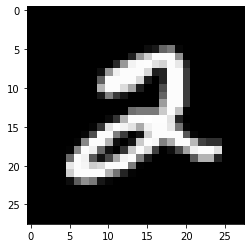

In [ ]:
# Solution
import matplotlib.pyplot as plt
img = X[0].reshape(28, 28)
plt.imshow(img, cmap = 'gray');

## Problem-4

Center the the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n \cdot d} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{d} (X_{ij}^{\prime})^2}
$$

In [ ]:
# Solution
def center(X):
    return X - X.mean(axis = 0)

n, d = X.shape
X_prime = center(X)
print(np.sqrt((X_prime ** 2).sum()) / (n * d))

0.23242174456564685


## Problem-5

Compute the covariance matrix $\mathbf{C}$ of the centered dataset.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{d^2} \sqrt{\sum \limits_{i = 1}^{d} \sum \limits_{j = 1}^{d} C_{ij}^2}
$$

In [ ]:
# Solution
def covariance(X):
    return X.T @ X / X.shape[0]

C = covariance(X_prime)
d = C.shape[0]
print(np.sqrt((C ** 2).sum()) / d ** 2)

1.3648061009232249


## Problem-6

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

<u>Conversion</u>

Compute:
$$
\mathbf{w} = \mathbf{w}_1 + \mathbf{w}_2
$$

Enter the following quantity as your answer correct to two decimal places:

$$
\left| \sum \limits_{i = 1}^{d} w_i \right|
$$

In [ ]:
# Solution
def compute_pc(C):
    d = C.shape[0]
    eigval, eigvec = np.linalg.eigh(C)
    w_1, w_2 = eigvec[:, -1], eigvec[:, -2]
    assert w_1.shape[0] == w_2.shape[0] == d
    return w_1, w_2

w_1, w_2 = compute_pc(C)
w = w_1 + w_2
print(abs(w.sum()))

1.051624388059819


## Problem-7

Visualize the first principal component as an image.

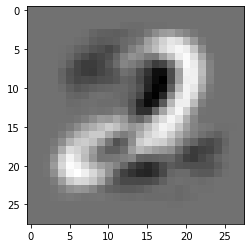

In [ ]:
# Solution
w_1_image = w_1.reshape(28, 28)
plt.imshow(w_1_image, cmap = 'gray')

## Problem-8

Find the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

In [ ]:
# Solution
def choose_k(C):
    eigval, eigvec = np.linalg.eigh(C)
    eigval = list(reversed(eigval))
    tot = sum(eigval)
    for k in range(len(eigval)):
        if sum(eigval[: k + 1]) / tot >= 0.95:
            return k + 1
    return len(eigval)

print(choose_k(C))

53


## Problem-9

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



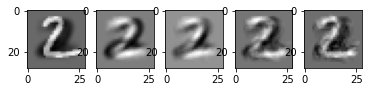

In [ ]:
# Solution
def reconstruct(C, test_image, thresh):
    eigval, eigvec = np.linalg.eigh(C)
    eigval = list(reversed(eigval))
    tot = sum(eigval)
    K = len(eigval)
    for k in range(len(eigval)):
        if sum(eigval[: k + 1]) / tot >= thresh:
            K = k + 1
            break
    W = eigvec[:, -K: ]
    coeff = test_image @ W
    return W @ coeff

# Original mean subtracted image
test_image = np.float64(test_image) - X.mean(axis = 0)
plt.subplot(1, 5, 1)
plt.imshow(test_image.reshape(28, 28), cmap = 'gray')
# 0.20
recon_image = reconstruct(C, test_image, 0.20)
plt.subplot(1, 5, 2)
plt.imshow(recon_image.reshape(28, 28), cmap = 'gray')
# 0.5
recon_image = reconstruct(C, test_image, 0.50)
plt.subplot(1, 5, 3)
plt.imshow(recon_image.reshape(28, 28), cmap = 'gray')
# 0.80
recon_image = reconstruct(C, test_image, 0.80)
plt.subplot(1, 5, 4)
plt.imshow(recon_image.reshape(28, 28), cmap = 'gray')
# 0.95
plt.subplot(1, 5, 5)
recon_image = reconstruct(C, test_image, 0.95)
plt.imshow(recon_image.reshape(28, 28), cmap = 'gray')